 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [74]:
# Initial imports
import pandas as pd                 #Import pandas
import numpy as np                  #Import numpy
import datetime as dt               #Import datetime
from pathlib import Path            #Import Path from pathlib

%matplotlib inline                  #Makes matploglib callable 'inline' in Jupyter notebooks.

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whalepath = Path('Resources/whale_returns.csv')                                                         #Set path to Whale data
whale_df = pd.read_csv(whalepath, index_col='Date', infer_datetime_format=True, parse_dates=True)       #Read in the Whale data
whale_df.head()                                                                                         #Take a look at a few rows of the Whale data.

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isnull().sum()         #checking for missing data points.

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df.dropna(inplace=True)           #dropping out the missing data points
whale_df.isnull().sum()                 #Checking to see that the missing data points have been remvoed.

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns                       
algopath = Path('Resources/algo_returns.csv')                                                               #Set path to the Algorithmic data set
algo_df = pd.read_csv(algopath, index_col='Date', infer_datetime_format=True, parse_dates=True)             #Read in the Algorithmic data set
algo_df.head(10)                                                                                            #Take a look at the Algorighmic data set


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [6]:
# Count nulls
algo_df.isna().sum()            #Checking for missing data points

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df.dropna(inplace=True)            #culling the missing data points from the data set.
algo_df.isna().sum()                    #checking to make sure that the missing data points were removed

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [120]:
# Reading S&P 500 Closing Prices
sp500path = Path('Resources/sp500_history.csv')                                                         #Setting the path to the s&p500 data set
sp500_df = pd.read_csv(sp500path, index_col='Date', infer_datetime_format=True, parse_dates=True)       #Reading in the s&p500 data set, setting the index to the "Date" column, fixing and parsing the date.
sp500_df.head()                                                                                         #Having a look at the data and its structure.

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [121]:
# Check Data Types
print(sp500_df.dtypes)         #checking the data type. I printed the answer. It tells me that I have fixed the problem with the '$' in the closing price. If you are running through this the first time it will not come back as a float. I fix it in the next step

Close    object
dtype: object


In [122]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')                       #Getting rid of the '$' by replacing it with nothing.... essentially deleting the hard way.
sp500_df['Close'] = sp500_df['Close'].astype(float)                              #Changing the type of data in the close column from str to float.
print(sp500_df.dtypes)                                                          #Printing it out as an answer.

Close    float64
dtype: object


/Users/richardmelvin/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [123]:
# Calculate Daily Returns
sp500_daily_returns = sp500_df.pct_change()             #Calculating the daily return as the percent change from the previous day
sp500_daily_returns.head()                              #Having a look at the result

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [12]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True)            #The pct_change function naturally introduces a null at the top of the column that needs to be removed. Here I am dropping the null.
sp500_daily_returns.isnull().sum()                  #Checking to see the null value has gone away.

Close    0
dtype: int64

In [124]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.rename(columns= {'Close': 'SP500'}, inplace=True)           #Renaming the column as specified
sp500_daily_returns.head()                                                      #Having a look to see that the column was renamed.

,SP500
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


## Combine Whale, Algorithmic, and S&P 500 Returns

In [125]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns_df = pd.concat([whale_df, algo_df, sp500_daily_returns], axis='columns', join='inner')                                     #Using concatenation to combine the dataframes. Concatenating columnwise, and keeping the intersection ('inner')
combined_returns_df.head()                                                                                                                  #Having a look

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

(<AxesSubplot:title={'center':'Overlay of daily returns of all portfolios.'}, xlabel='Date'>,
 <AxesSubplot:title={'center':'Daily returns for the Whale portfolio.'}, xlabel='Date'>,
 <AxesSubplot:title={'center':'Daily returns for the Algorithmic portfolio.'}, xlabel='Date'>,
 <AxesSubplot:title={'center':'Daily returns for the S&P 500.'}, xlabel='Date'>)

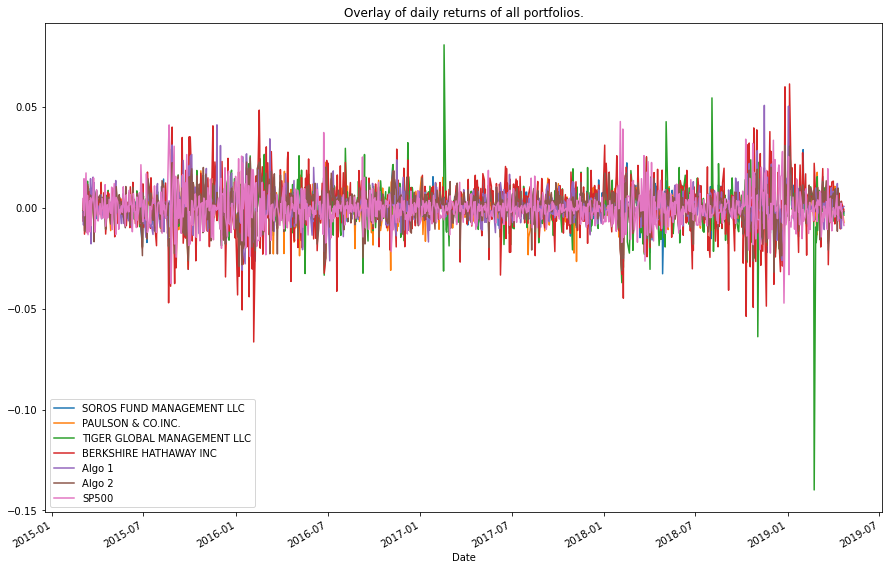

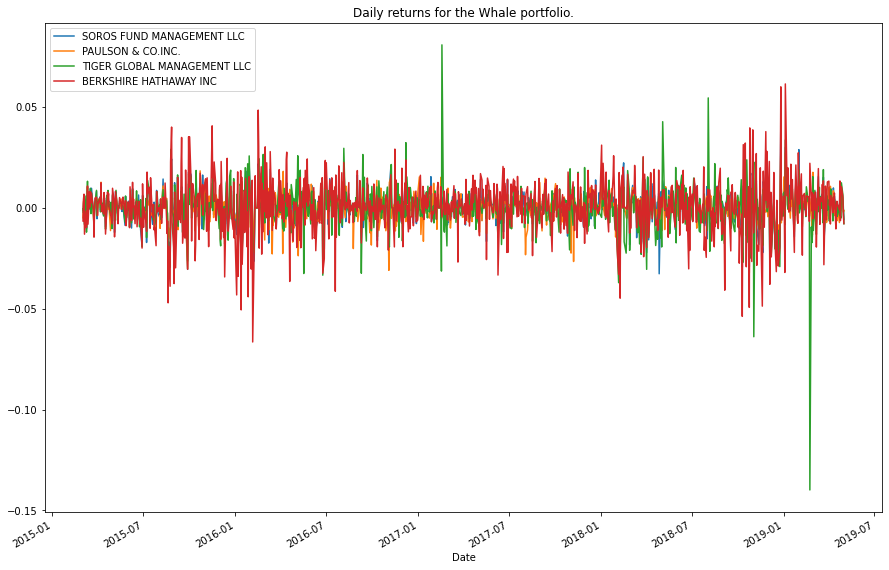

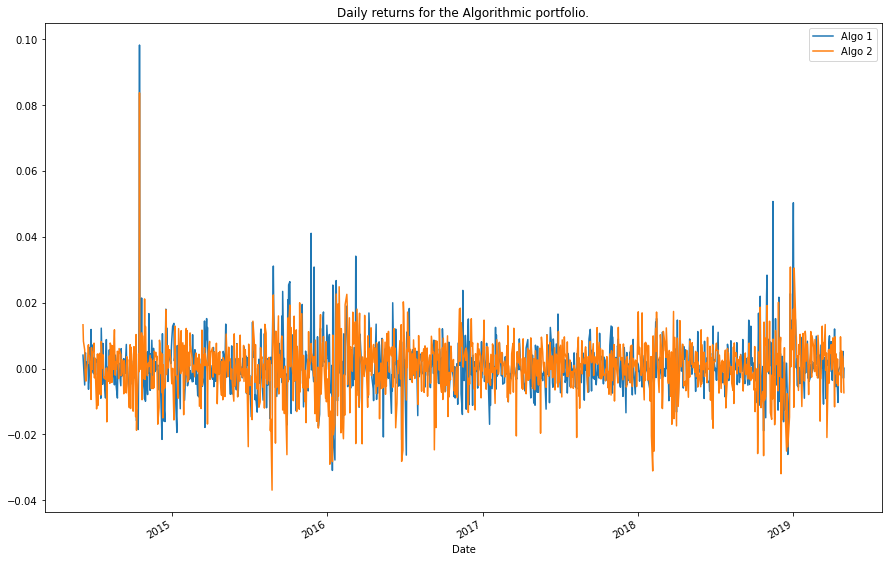

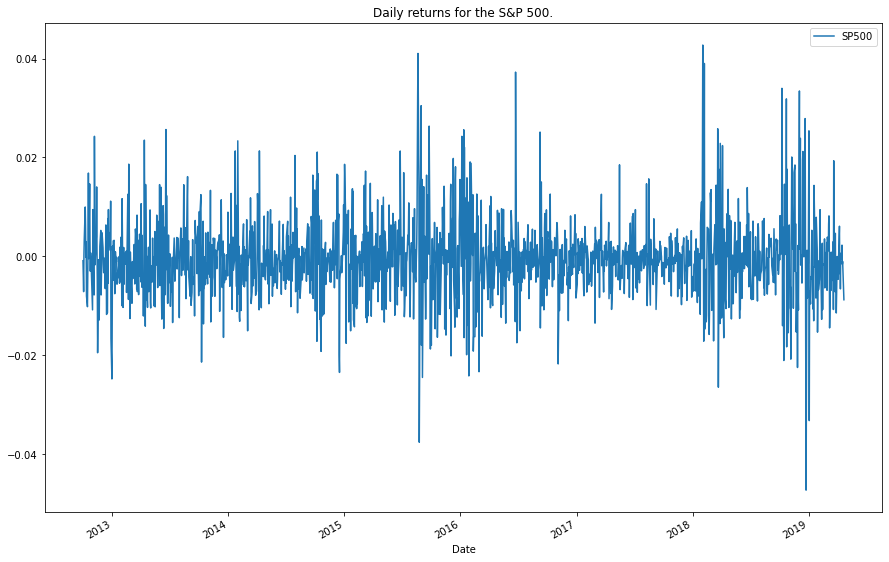

In [15]:
# Plot daily returns of all portfolios Wasn't sure if you wanted them all on top of each other (messy) or one by one (still a bit messy) so I did both.
combined_returns_df.plot(figsize=(15, 10), title= 'Overlay of daily returns of all portfolios.'), whale_df.plot(figsize=(15,10), title= 'Daily returns for the Whale portfolio.'), algo_df.plot(figsize=(15,10), title= 'Daily returns for the Algorithmic portfolio.'), sp500_daily_returns.plot(figsize=(15,10), title= 'Daily returns for the S&P 500.')

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Overlaid cumulative returns for all portfolios'}, xlabel='Date'>

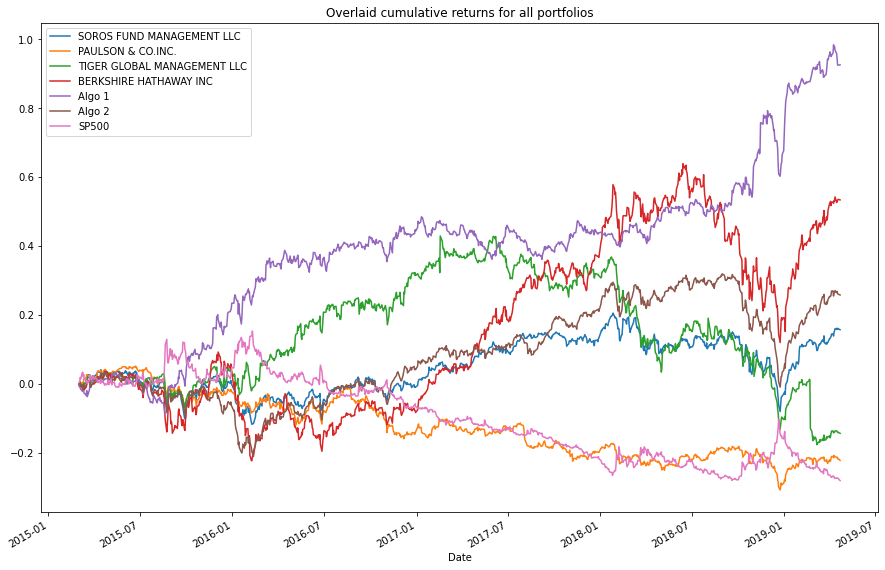

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_returns_all = (1 + combined_returns_df).cumprod() -1                                             #used cumprod to calculate the cumulative returns
# Plot cumulative returns
cumulative_returns_all.plot(figsize=(15, 10), title= 'Overlaid cumulative returns for all portfolios')      #Plotted cumulative returns.

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Box plots of daily returns for six portfolios and the S&P 500'}>

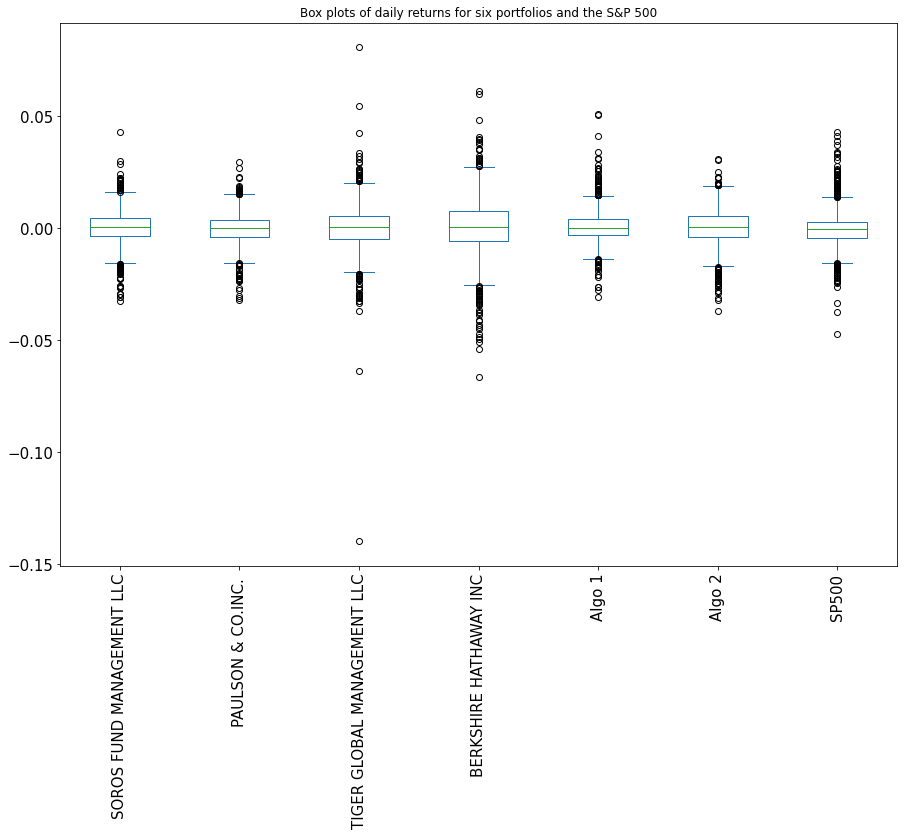

In [17]:
# Box plot to visually show risk
combined_returns_df.plot.box(figsize=(15, 10), rot= 90, fontsize=15, title='Box plots of daily returns for six portfolios and the S&P 500')  #Makes the box plot

### Calculate Standard Deviations

In [126]:
# Calculate the daily standard deviations of all portfolios
combined_stdev = combined_returns_df.std()                      #Calculates daily standard deviations of all portfolios
print(combined_stdev)                                           #Prints them out.

#Alternative method:
#combined_returns_df.aggregate('std')

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500                          0.008587
dtype: float64


SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500                          0.008587

### Determine which portfolios are riskier than the S&P 500

In [41]:
# Calculate  the daily standard deviation of S&P 500            #Here I make the assumption that you are asking for the stdev of daily returns as calculated in the previous step.
sp500_d_stdev = combined_returns_df['SP500'].std()
sp500_d_stdev

# Determine which portfolios are riskier than the S&P 500
# I found many ways to do this. The last one, Method 5 is my final answer.

#Method #1:
#stdev_series = pd.Series(combined_returns_df.std())             #Make a Pandas series out of the combined_stdev (previous step that calculated stdev of daily returns)
#riskier = []                                                    #Initialize a list of portfolios that are riskier than the S&P 500
#for index, value in stdev_series.items():                       #Iterate through and collect riskier portfolios to the riskier list
    #if value > sp500_d_stdev:                                   # by comparing to the sp500_d_stdev.
        #riskier.append(index)
#print(f'These portfolios are riskier than the S&P 500: {riskier}')      #Prints the list of portfolios that have standard deviation (risk) greater than that of the S&P 500.

#Method #2:
#stdev_list = combined_returns_df.std().to_dict()                           #Make a dictionary from combined_stdev (the step above)
#riskier = {k: v for k, v in stdev_list.items() if v > sp500_d_stdev}       #Pull key: value pairs where the value is greater than that of the S&P500 standard deviation and assign to a dictionary called 'riskier'.
#riskier

#Method #3:
#riskier =[]                                                                #Initialize a list
#for column in combined_returns_df:                                         #Set up a for loop to iterate through the columns in the combined_returns_df dataframe
    #if combined_returns_df[column].std() > sp500_d_stdev:                  #Set the condition for item selection.
       #riskier.append(column)                                              #Put the items that meet selection critera into the list named riskier
#print(f'These portfolios are riskier than the S&P 500: {riskier}')         #Print an answer.

#Method #4
#risk = pd.DataFrame(combined_stdev)     #Make a dataframe from combined_stdev series.
#risk.columns=['Std_Dev']                #Assign row labels
#risk['Riskier_than_S&P500'] = ''

#for i in range(0, risk.shape[0]):           #Iterate through rows of the dataframe and identify where the standard deviation of daily returns is greater than that of S&P500
    #if risk.iloc[i, 0] > sp500_d_stdev:
       #risk.iloc[i, 1] = 'Yes'              #'Yes' if standard deviation of the daily returns is greater than that of S&P500
    #else:
        #risk.iloc[i, 1] = 'No'              #'No if standard deviation of the daily returns is less than that of s&P500

#risk                                        #Returns the dataframe so that you can read off which portfolios are riskier than the S&P500

#Method #5
#I like this one because it stays within Pandas and is pretty simple. The message is long but, I like answers in complete sentences and I hope that you do too.

risk_df = pd.DataFrame(combined_stdev, columns=['Daily_Std_Dev'])     #Make a dataframe from the combined_stdev series.
risk_df.index.name='PORTFOLIO:'                                #I wanted an index name for the output table
riskier = risk_df[risk_df['Daily_Std_Dev'] >= sp500_d_stdev]            #Filtering the data and pulling out rows that fit the criteria of 'riskier than the S&P 500 = StdDev(Portfolio) > StdDev(S&P500) I included eaual to (=) because I wanted the comparison to be evident in the output table.

                                                            #Next comes a rather long statement that I felt was necessary for a reader to understand what this table is showing.
print(f'Table 1.\n\
Portfolios that are riskier than the S&P 500\n\
as determined by comparing standard deviation\n\
(Std_Dev) of daily returns. Std_Dev of S&P500\n\
is given for comparison.\n\n\
 {riskier}')

Table 1.
Portfolios that are riskier than the S&P 500
as determined by comparing standard deviation
(Std_Dev) of daily returns. Std_Dev of S&P500
is given for comparison.

                              Daily_Std_Dev
PORTFOLIO:                                
TIGER GLOBAL MANAGEMENT LLC       0.010897
BERKSHIRE HATHAWAY INC            0.012919
SP500                             0.008587


Table 1.
Portfolios that are riskier than the S&P 500
as determined by comparing standard deviation
(Std_Dev) of daily returns. Std_Dev of S&P500
is given for comparison.

                              Daily_Std_Dev
PORTFOLIO:                                
TIGER GLOBAL MANAGEMENT LLC       0.010897
BERKSHIRE HATHAWAY INC            0.012919
SP500                             0.008587

### Calculate the Annualized Standard Deviation

In [44]:
# Calculate the annualized standard deviation (252 trading days)

#annualized_stdev = combined_returns_df.std()* np.sqrt(252)      #called square root function of numpy
#annualized_stdev

#Another way to do this is:
#risk_df.columns=['Daily_Std_Dev', 'Annualized_Std_Dev']                     #Name the columns
#risk_df                      
risk_df['Annualized_Std_Dev'] = risk_df['Daily_Std_Dev'] * np.sqrt(252)        #Make a new column for the annualized standard deviation and use the Std_Dev column for calculation of values.
print(f'Table 2. Daily and Annualized Standard Deviation.\n\n\
{risk_df}')                                                                 #Print the dataframe so the values can be viewed.

Table 2. Daily and Annualized Standard Deviation.

                             Daily_Std_Dev  Annualized_Std_Dev
PORTFOLIO:                                                    
SOROS FUND MANAGEMENT LLC         0.007896            0.125348
PAULSON & CO.INC.                 0.007026            0.111527
TIGER GLOBAL MANAGEMENT LLC       0.010897            0.172989
BERKSHIRE HATHAWAY INC            0.012919            0.205079
Algo 1                            0.007623            0.121006
Algo 2                            0.008341            0.132413
SP500                             0.008587            0.136313


Table 2. Daily and Annualized Standard Deviation.

                             Daily_Std_Dev  Annualized_Std_Dev
PORTFOLIO:                                                    
SOROS FUND MANAGEMENT LLC         0.007896            0.125348
PAULSON & CO.INC.                 0.007026            0.111527
TIGER GLOBAL MANAGEMENT LLC       0.010897            0.172989
BERKSHIRE HATHAWAY INC            0.012919            0.205079
Algo 1                            0.007623            0.121006
Algo 2                            0.008341            0.132413
SP500                             0.008587            0.136313

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Twenty-one day rolling standard deviation for six portfolios and the S&P 500'}, xlabel='Date'>

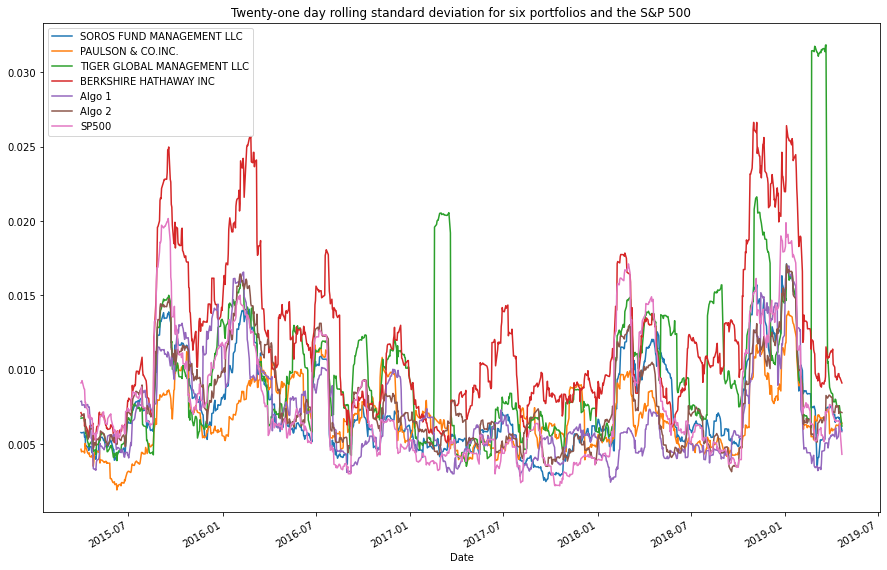

In [45]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_stdev_21d = combined_returns_df.rolling(window=21).std()                                                                    #rolling 21-d standard deviation calc
rolling_stdev_21d                                                                                                                   # took a look at it
# Plot the rolling standard deviation
rolling_stdev_21d.plot(figsize=(15, 10), title= 'Twenty-one day rolling standard deviation for six portfolios and the S&P 500')     #plot

### Calculate and plot the correlation

In [46]:
# Calculate the correlation
correlation = combined_returns_df.corr()                #Calculates correlation matrix

# Display de correlation matrix
correlation                                             #This just calls the correlation matrix. I couldn't sort out how to get nice formating for a print statement.

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
SP500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [47]:
# Calculate covariance of a single portfolio
covar_sfm = combined_returns_df['SOROS FUND MANAGEMENT LLC'].cov(combined_returns_df['SP500'])          #calculate covariation of Soros with Sp500
# Calculate variance of S&P 500
var_sp500 = combined_returns_df['SP500'].var()                                                          #calculates variation of SP500
# Computing beta
beta_sfm = covar_sfm / var_sp500 
print(f'The calculated Beta for the Soros Fund Management LLC Portfolio is {round(beta_sfm, 5)}')       #calculates beta

The calculated Beta for the Soros Fund Management LLC Portfolio is 0.00053


The calculated Beta for the Soros Fund Management LLC Portfolio is 0.00053

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'Exponentially weighted moving average (EWMA) of standard deviation for six portfolios and the S&P500'}, xlabel='Date'>

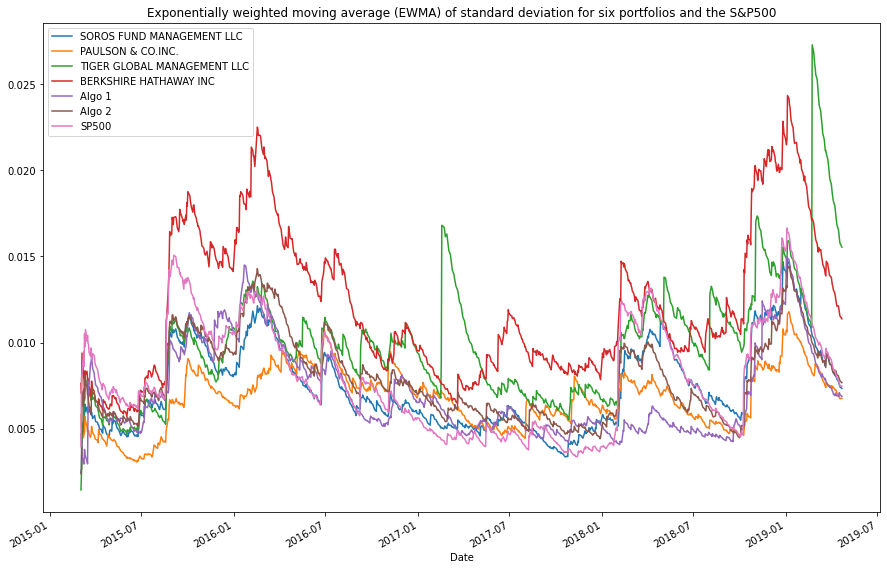

In [48]:
# Use `ewm` to calculate the rolling window
ewma_stdev = combined_returns_df.ewm(halflife=21, adjust=True).std()                                                                                #EWMA calc. I like this. I have used this a lot for biology applications, especially time-course studies.
ewma_stdev.plot(figsize=(15, 10), title= 'Exponentially weighted moving average (EWMA) of standard deviation for six portfolios and the S&P500')     #plot

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [49]:
#Get the risk free rate data 
risk_free_rate_path = Path('Resources/risk_free_rate.csv')                                                          #I pulled this file from our coursework on the Sharp Ratio
riskfree_df = pd.read_csv(risk_free_rate_path, index_col='Date', infer_datetime_format=True, parse_dates=True)      #Dataframe, Date as index, making sure that format is uniform
riskfree_df.tail()                                                                                                  #I had a look at the tail to see that the data covered the dates of the other files... it does.
riskfree_df.isnull().sum()                                                                                          #Due diligence checking that there are no gaps in the data. There were no nulls
updated_combined_returns_df = pd.concat([combined_returns_df, riskfree_df], axis='columns', join='inner')           #I do a column, inner concatenation to the combined returns dataframe.
updated_combined_returns_df.tail()                                                                                  #I have a peek at it to make sure it concated properly, first the head an then the tail. Looks fine BTW
# Annualized Sharpe Ratios
sharpe_ratios = ((updated_combined_returns_df.mean() - updated_combined_returns_df['rf_rate'].mean()) * 252) / (updated_combined_returns_df.std() * np.sqrt(252))   #Calculates annualized Sharpe Ratio
sharpe_ratios = pd.DataFrame(sharpe_ratios, columns=['Sharpe Ratio'])                                                                                               #Made the output into a dataframe for future use and to get column titles on the output.
sharpe_ratios.index.name='PORTFOLIO:'                                                                                                                               #Just to get the column labeled in the output
print(f'Table 4. Sharpe_ratios.\n\
{sharpe_ratios}')

Table 4. Sharpe_ratios.
                             Sharpe Ratio
PORTFOLIO:                               
SOROS FUND MANAGEMENT LLC        0.190407
PAULSON & CO.INC.               -0.710552
TIGER GLOBAL MANAGEMENT LLC     -0.289643
BERKSHIRE HATHAWAY INC           0.506337
Algo 1                           1.138814
Algo 2                           0.297261
SP500                           -0.779208
rf_rate                          0.000000


Table 4. Sharpe_ratios.
                             Sharpe Ratio
PORTFOLIO:                               
SOROS FUND MANAGEMENT LLC        0.190407
PAULSON & CO.INC.               -0.710552
TIGER GLOBAL MANAGEMENT LLC     -0.289643
BERKSHIRE HATHAWAY INC           0.506337
Algo 1                           1.138814
Algo 2                           0.297261
SP500                           -0.779208
rf_rate                          0.000000

<AxesSubplot:title={'center':'Sharpe ratios for six portfolios and the S&P500'}, xlabel='PORTFOLIO:'>

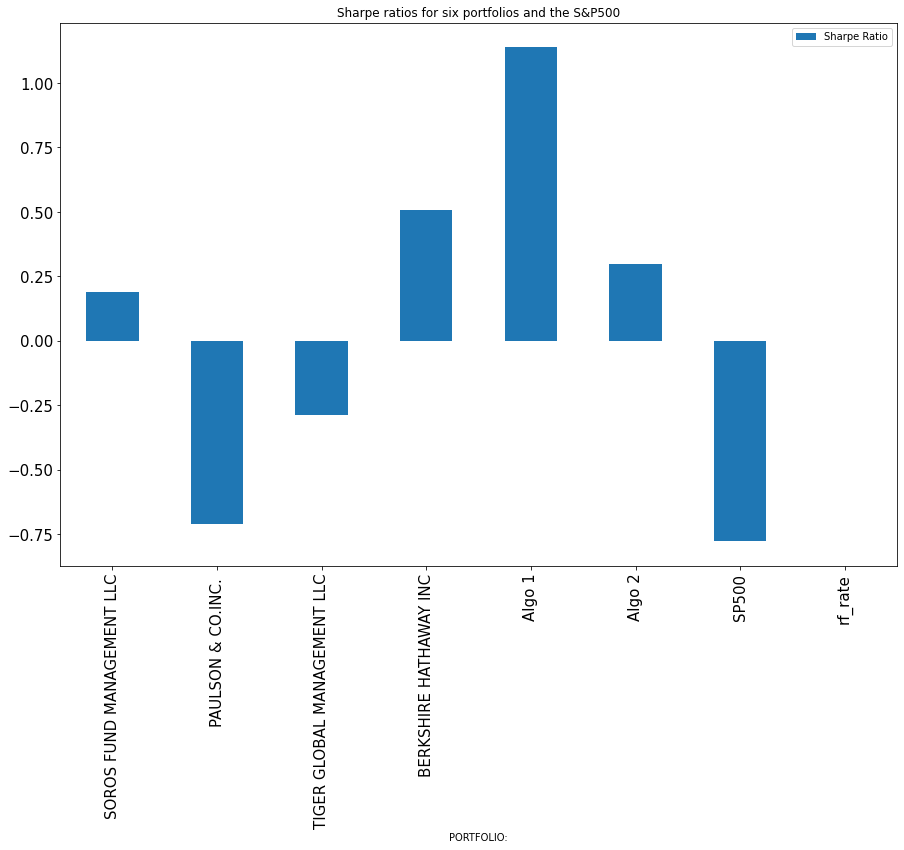

In [50]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', figsize=(15, 10), title='Sharpe ratios for six portfolios and the S&P500', fontsize=15)      #Plots Sharpe ratios. Sorry, I could not find how to get a line at y=0.

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.
## My Answer:
From the Figure above (Sharp Ratios for six portfolios and the S&P500), we see that the Algorithmic portfolios (Algo1 and Algo2) are outperforming 3 out of 4 Whale portfolios (the four left-most bars in the figure) andthe S&P500. The Algorithmic portfolio, 'Algorithmic 1' outperforms the Whale portfolio, 'Berkshire Hathaway Inc'. However, the Algorithmic 2 portfolio is outperformed by the Berkshire Hathaway Inc portfolio. The above figure and plots of return and risk agree that the Algorithmic 1 portfolio deliver the highest returns while incuring the lowest risk.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [53]:
# Reading data from 1st stock
etsypath = Path("Resources/ETSY.csv")                                                               #Data for Etsy was retreived using Googlefinance and downloaded into the Resources folder.
etsy_df = pd.read_csv(etsypath, index_col='Date', infer_datetime_format=True, parse_dates=True)     #csv file read in, indexed to the Date column, date formated and parsed
etsy_df.rename(columns= {'Close': 'ETSY'}, inplace=True)                                            #changed the name of the single column from 'Close' to 'Etsy'. The data are closing prices but this will make the column identifiable when I merge data frames.
#etsy_df.isnull().sum()                                                                             # I checked to see if there were any missing data points. There were not. This is hashed out now.
etsy_df.head()                                                                                      #Looking at the top five rows to verify the dataframe, index, and column label.

,ETSY
Date,
2015-04-16,30.00
2015-04-17,27.58
2015-04-20,24.90
2015-04-21,25.75
2015-04-22,25.12


In [54]:
# Reading data from 2nd stock
melipath = Path("Resources/MELI.csv")                                                               #Data for MercadoLibre was retreived using Googlefinance and downloaded into the Resources folder.
meli_df = pd.read_csv(melipath, index_col='Date', infer_datetime_format=True, parse_dates=True)     #csv file read in, indexed to the Date column, date formated and parsed.
meli_df.rename(columns= {'Close': 'MELI'}, inplace=True)                                    #changed the name of the single column from 'Close' to 'MercadoLibre'. The data are closing prices but this will make the column identifiable when I merge data frames.
#meli_df.isnull().sum()                                                                             # I checked to see if there were any missing data points. There were not. This is hashed out now.
meli_df.head()                                                                                      #Looking at the top five rows to verify the dataframe, index, and column label.

,MELI
Date,
2015-03-03,133.9
2015-03-04,131.3
2015-03-05,132.0
2015-03-06,129.2
2015-03-09,125.0


In [55]:
# Reading data from 3rd stock
tdocpath = Path("Resources/TDOC.csv")                                                               #Data for Teladoc Health was retreived using Googlefinance and downloaded into the Resources folder.
tdoc_df = pd.read_csv(tdocpath, index_col='Date', infer_datetime_format=True, parse_dates=True)     #csv file read in, indexed to the Date column, date formated and parsed.
tdoc_df.rename(columns= {'Close': 'TDOC'}, inplace=True)                                       #changed the name of the single column from 'Close' to 'Pinterest'. The data are closing prices but this will make the column identifiable when I merge data frames.
#pins_df.isnull().sum()                                                                             # I checked to see if there were any missing data points. There were not. This is hashed out now.
tdoc_df.head()                                                                                      #Looking at the top five rows to verify the dataframe, index, and column label.


,TDOC
Date,
2015-07-01,28.50
2015-07-02,28.00
2015-07-06,26.69
2015-07-07,27.01
2015-07-08,26.25


In [56]:
# Combine all stocks in a single DataFrame
rich_portfolio_df = pd.concat([etsy_df, meli_df, tdoc_df], axis='columns', join='inner')              #Concatenated the three stock dataframes to make my portfolio (Rich_portfolio). I concatenated along the columns axis and joined inner (interscetion of the index values).
rich_portfolio_df.head()                                                                               #I took a look at the dataframe. It looked nice.

,ETSY,MELI,TDOC
Date,,,
2015-07-01,14.01,141.46,28.50
2015-07-02,13.27,138.71,28.00
2015-07-06,13.40,135.99,26.69
2015-07-07,13.32,135.29,27.01
2015-07-08,14.55,129.90,26.25


In [57]:
# Reset index                                                       #I don't know why I would need to do this.
rich_portfolio_df.reset_index(inplace=True)
rich_portfolio_df

,Date,ETSY,MELI,TDOC
0,2015-07-01,14.01,141.46,28.50
1,2015-07-02,13.27,138.71,28.00
2,2015-07-06,13.40,135.99,26.69
3,2015-07-07,13.32,135.29,27.01
4,2015-07-08,14.55,129.90,26.25
...,...,...,...,...
951,2019-04-12,65.38,504.52,53.45
952,2019-04-15,66.20,513.68,54.03
953,2019-04-16,66.28,501.96,52.55
954,2019-04-17,64.25,498.38,49.86


In [58]:
# Reorganize portfolio data by having a column per symbol           #I'm not quite with you here as I had the data orgaized that way originaly. ????
rich_portfolio_df.set_index('Date', inplace=True)
rich_portfolio_df

,ETSY,MELI,TDOC
Date,,,
2015-07-01,14.01,141.46,28.50
2015-07-02,13.27,138.71,28.00
2015-07-06,13.40,135.99,26.69
2015-07-07,13.32,135.29,27.01
2015-07-08,14.55,129.90,26.25
...,...,...,...
2019-04-12,65.38,504.52,53.45
2019-04-15,66.20,513.68,54.03
2019-04-16,66.28,501.96,52.55


In [59]:
# Calculate daily returns
rich_daily_returns = rich_portfolio_df.pct_change()             #daily returns using pct_change()
# Drop NAs
rich_daily_returns.dropna(inplace=True)                         #getting rid of the inevitable na
# Display sample data
rich_daily_returns.head()                                       #a quick look to see that the na's are gone

,ETSY,MELI,TDOC
Date,,,
2015-07-02,-0.052819,-0.019440,-0.017544
2015-07-06,0.009797,-0.019609,-0.046786
2015-07-07,-0.005970,-0.005147,0.011990
2015-07-08,0.092342,-0.039840,-0.028138
2015-07-09,0.113402,0.026251,0.015619


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [61]:
# Set weights
weights = [1/3, 1/3, 1/3]                                                   #thanks for the weights

# Calculate portfolio return
rich_portfolio_returns_df = rich_daily_returns.dot(weights)                 #using .dot with the weights
# Display sample data
rich_returns_df = pd.DataFrame(rich_portfolio_returns_df, columns= ['Rich'])  # I wanted this formated as a dataframe for merging with anothe dataframe.
rich_returns_df.head()



,Rich
Date,
2015-07-02,-0.029934
2015-07-06,-0.018866
2015-07-07,0.000291
2015-07-08,0.008121
2015-07-09,0.051757


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [64]:
# Join your returns DataFrame to the original returns DataFrame
all_returns_df = pd.concat([combined_returns_df, rich_returns_df], axis='columns', join='inner')        #joined via concatenation
all_returns_df.tail()                                                                                   #taking a look

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,Rich
Date,,,,,,,,
2019-04-12,0.005663,-0.001165,0.004217,0.007316,-0.005501,0.004504,0.000630,-0.020937
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,0.013850
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,-0.016333
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,-0.029650
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011,0.002956


In [69]:
# Only compare dates where return data exists for all the stocks (drop NaNs)        #I downloaded data for the same dates as the first data set so was confident that there were no missing data points.
any_nas = all_returns_df.isna().sum()                                                         #I checked to see if there were any na's, there were none so data is ok.
print(f'Table 5. No NAs to remove :) !\n\
\n{any_nas}')

Table 5. No NAs to remove :) !

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP500                          0
Rich                           0
dtype: int64


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [72]:
# Calculate the annualized `std`
annualized_std = all_returns_df.std() * np.sqrt(252)                #annualized standard deviation
print(f'Table 6. Annualized standard deviaions\n\
\n{annualized_std}')

Table 6. Annualized standard deviaions

SOROS FUND MANAGEMENT LLC      0.128499
PAULSON & CO.INC.              0.115044
TIGER GLOBAL MANAGEMENT LLC    0.178691
BERKSHIRE HATHAWAY INC         0.211718
Algo 1                         0.123443
Algo 2                         0.135280
SP500                          0.138271
Rich                           0.373094
dtype: float64


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling standard deviation (21-d window).'}, xlabel='Date'>

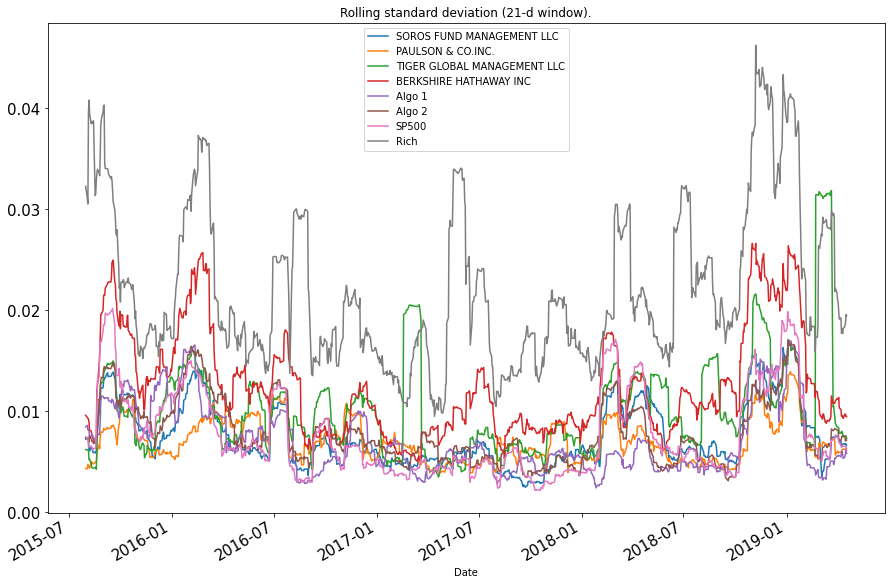

In [77]:
# Calculate rolling standard deviation
all_rolling_std = all_returns_df.rolling(window=21).std()                                               #using .rolling with window of 21d
# Plot rolling standard deviation
all_rolling_std.plot(figsize=(15, 10), title='Rolling standard deviation (21-d window).', fontsize= 15)

### Calculate and plot the correlation

<AxesSubplot:>

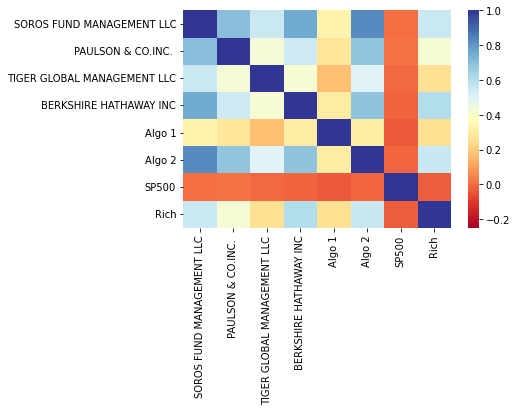

In [88]:
# Calculate and plot the correlation
import seaborn as sbn                                                       #wasn't sure which correlation you wanted so I imported seaborn and 'plotted' them all using a heatmap representation.
all_correlation = all_returns_df.corr()
sbn.heatmap(all_correlation, vmin=-0.25, vmax=1, cmap='RdYlBu')

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-d Beta for Rich portfolio v. the S&P500'}, xlabel='Date'>

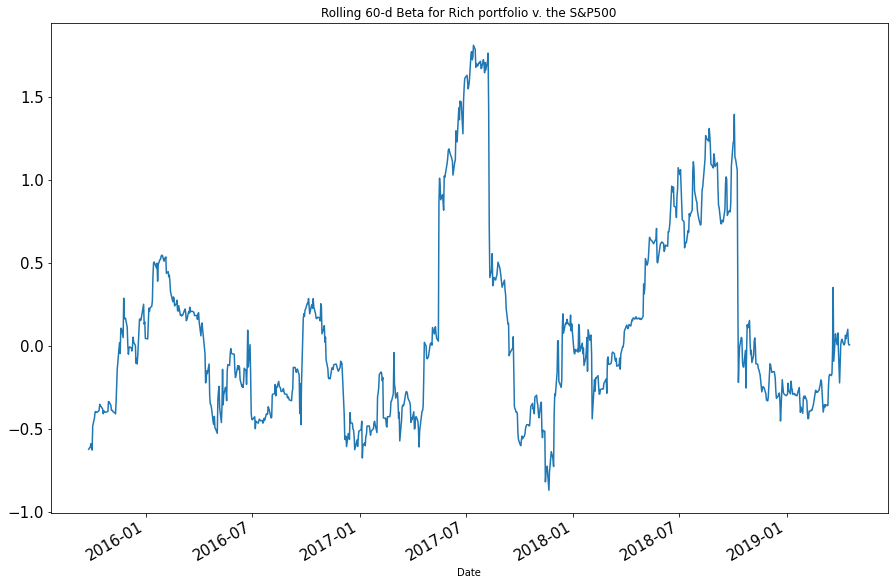

In [90]:
# Calculate and plot Beta                                                                                       #Anyone listen to The Fall https://www.youtube.com/watch?v=Ab4nMS4csng?
he_was = all_returns_df['Rich'].rolling(window=60).cov(all_returns_df['SP500'])                                 #Calculate the rolling covariance of the Rich portfolio with the S&P500 using a window of 60d
a_rolling_man = all_returns_df['SP500'].rolling(window=60).var()                                                #Calculate the rolling variance of the S&P500 using a window of 60d
rolling_danny = he_was / a_rolling_man                                                                          #Calculate the rolling beta (cov/ var) for the Rich portfolio v. the S&P500
rolling_danny.plot(figsize=(15, 10), title= 'Rolling 60-d Beta for Rich portfolio v. the S&P500', fontsize=15)  #Plots the rolling 60-d beta for the Rich portfolio v. the S&P500.

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [97]:
# Calculate Annualized Sharpe Ratios sharpe_ratios 
updated_all_returns_df = pd.concat([all_returns_df, riskfree_df], axis='columns', join='inner')           #I do a column, inner concatenation to the combined returns dataframe.
updated_all_returns_df.tail()  

annu_sharpe_rat = ((updated_all_returns_df.mean() -updated_all_returns_df['rf_rate'].mean()) * 252) / (updated_all_returns_df.std() * np.sqrt(252))
annu_sharpe_rat

SOROS FUND MANAGEMENT LLC      0.193694
PAULSON & CO.INC.             -0.828829
TIGER GLOBAL MANAGEMENT LLC   -0.294782
BERKSHIRE HATHAWAY INC         0.521410
Algo 1                         1.238016
Algo 2                         0.320509
SP500                         -0.865627
Rich                           1.132519
rf_rate                        0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios for 7 portfolios and the S&P500'}>

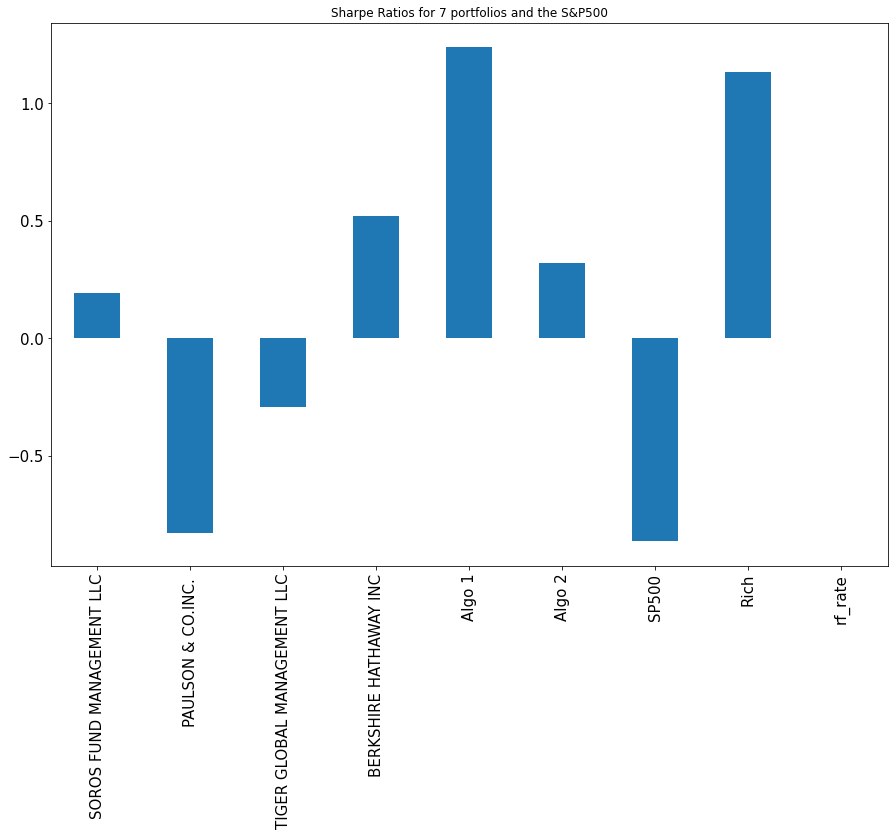

In [101]:
# Visualize the sharpe ratios as a bar plot
annu_sharpe_rat.plot(kind='bar', figsize=(15, 10), title='Sharpe Ratios for 7 portfolios and the S&P500', fontsize=15)

### How does your portfolio do?

The Rich portfolio, does very well. First it shows some negative Beta, which means that it hedges against market volatility, i.e. it frequently moves opposite to the market. Second, with a Sharpe Ratio of 1.13, the Rich portfolio rivals the Algorithmic 1 portfolio.